In [2527]:
import sys
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
#from pymystem3 import Mystem
import re 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from sklearn.model_selection import GroupShuffleSplit
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet import ResNet50
from keras.models import Model, Sequential
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dropout, Flatten, Dense
from keras.layers import *
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
#from scipy.misc import imsave
import  numpy  as  np
from keras.layers import *
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
import random
import torch
import torch.nn as nn
from math import ceil
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from tensorflow.keras.preprocessing.image import load_img

## 1. Исследовательский анализ данных

In [2645]:
df_train = pd.read_csv('D:\\to_upload\\train_dataset.csv')
df_train[:5]

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .


In [2646]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [2647]:
df_train.isna().sum() 

image         0
query_id      0
query_text    0
dtype: int64

In [2648]:
df_train.duplicated().sum()

0

In [2649]:
value_croud = pd.read_csv('D:\\to_upload\\CrowdAnnotations.tsv', sep='\t')

In [2650]:
value_croud[:5]

,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1,3,0
0,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
1,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.0,0,3


In [2651]:
value_croud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47829 entries, 0 to 47828
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   1056338697_4f7d7ce270.jpg    47829 non-null  object 
 1   1056338697_4f7d7ce270.jpg#2  47829 non-null  object 
 2   1                            47829 non-null  float64
 3   3                            47829 non-null  int64  
 4   0                            47829 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [2652]:
value_croud.isna().sum()

1056338697_4f7d7ce270.jpg      0
1056338697_4f7d7ce270.jpg#2    0
1                              0
3                              0
0                              0
dtype: int64

In [2653]:
value_croud.duplicated().sum()

0

In [2654]:
value_expert = pd.read_csv('D:\\to_upload\\ExpertAnnotations.tsv', sep='\t')

In [2655]:
value_expert[:5]

,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1.1,1.2
0,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
1,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
3,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
4,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1


In [2656]:
value_expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5821 entries, 0 to 5820
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   1056338697_4f7d7ce270.jpg    5821 non-null   object
 1   2549968784_39bfbe44f9.jpg#2  5821 non-null   object
 2   1                            5821 non-null   int64 
 3   1.1                          5821 non-null   int64 
 4   1.2                          5821 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [2657]:
value_expert.isna().sum()

1056338697_4f7d7ce270.jpg      0
2549968784_39bfbe44f9.jpg#2    0
1                              0
1.1                            0
1.2                            0
dtype: int64

In [2658]:
value_expert.duplicated().sum()

0

<div class="alert alert-info">
     Данные в таблицах с трейновой выборкой, оценками людей и экспертов не содержат пропусков и дубликатов. 
</div>

In [2659]:
value_croud = value_croud.rename(columns={'1056338697_4f7d7ce270.jpg': 'image', '1056338697_4f7d7ce270.jpg#2': 'query_id'})

In [2660]:
value_expert = value_expert.rename(columns={'1056338697_4f7d7ce270.jpg': 'image', '2549968784_39bfbe44f9.jpg#2': 'query_id'})

In [2661]:
value_expert = value_expert.rename(columns={'1': '1.0'})

In [2662]:
df_train_ = pd.merge(value_expert, value_croud, on=['image', 'query_id'], how = 'outer') 

In [2663]:
df_train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51322 entries, 0 to 51321
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     51322 non-null  object 
 1   query_id  51322 non-null  object 
 2   1.0       5821 non-null   float64
 3   1.1       5821 non-null   float64
 4   1.2       5821 non-null   float64
 5   1         47829 non-null  float64
 6   3         47829 non-null  float64
 7   0         47829 non-null  float64
dtypes: float64(6), object(2)
memory usage: 3.1+ MB


<div class="alert alert-info">
     Таблицы с оценками людей и экспертов объединены по двум полям - image и query_id. Итоговая таблица содежит 51332 строки, однако, только 5821 пар
(image+query) имеют оценки экспертов, но не имеют оценок людей. И, наоборот, 47829 пар имеют оценки людей, но не имеют оценок экспертов.  
</div>

In [2664]:
df_y = df_train[['query_id', 'query_text']]

In [2665]:
df_y = df_y.drop_duplicates()

In [2666]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 977 entries, 0 to 5821
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    977 non-null    object
 1   query_text  977 non-null    object
dtypes: object(2)
memory usage: 22.9+ KB


In [2667]:
df_train_t = pd.merge(df_y, df_train_, on='query_id')

In [2668]:
df_train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   query_id    50213 non-null  object 
 1   query_text  50213 non-null  object 
 2   image       50213 non-null  object 
 3   1.0         5821 non-null   float64
 4   1.1         5821 non-null   float64
 5   1.2         5821 non-null   float64
 6   1           46720 non-null  float64
 7   3           46720 non-null  float64
 8   0           46720 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.4+ MB


In [2669]:
len(df_train_t['query_id'].unique())

977

In [2670]:
df_train_t[:5]

,query_id,query_text,image,1.0,1.1,1.2,1,3,0
0,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1056338697_4f7d7ce270.jpg,NaN,NaN,NaN,0.0,0.0,3.0
1,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,106490881_5a2dd9b7bd.jpg,NaN,NaN,NaN,0.0,0.0,3.0
2,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1224851143_33bcdd299c.jpg,NaN,NaN,NaN,0.0,0.0,3.0
3,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1237985362_dbafc59280.jpg,NaN,NaN,NaN,0.0,0.0,3.0
4,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1262583859_653f1469a9.jpg,1.0,1.0,1.0,NaN,NaN,NaN


<div class="alert alert-info">
     К полученной таблице df-train_ с оценками экспертов и лбдей  добавлена таблица с текстовыми сообщениями, очищенная 
от дубликатов. 
</div>

In [2671]:
df_train_t_w = df_train_t.loc[(df_train_t['1.0'].isna()) & (df_train_t['1.1'].isna()) & (df_train_t['1.2'].isna())]

In [2672]:
df_train_t_w['target'] = df_train_t_w['1']

C:\Users\79284\AppData\Local\Temp\ipykernel_35280\3397033590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_t_w['target'] = df_train_t_w['1']


In [2673]:
df_train_t_p = df_train_t.loc[(df_train_t['1'].isna()) & (df_train_t['3'].isna()) & (df_train_t['0'].isna())]

In [2674]:
df_train_t_p['target'] = (df_train_t['1.0']+df_train_t['1.1']+df_train_t['1.2'])/(3*4)

C:\Users\79284\AppData\Local\Temp\ipykernel_35280\3988919437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_t_p['target'] = (df_train_t['1.0']+df_train_t['1.1']+df_train_t['1.2'])/(3*4)


In [2675]:
df_train_t_q = df_train_t.dropna()  

In [2676]:
df_train_t_q['target'] = 0.6*(df_train_t['1.0']+df_train_t['1.1']+df_train_t['1.2'])/(3*4) + 0.4*df_train_t['1']

C:\Users\79284\AppData\Local\Temp\ipykernel_35280\2843220031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_t_q['target'] = 0.6*(df_train_t['1.0']+df_train_t['1.1']+df_train_t['1.2'])/(3*4) + 0.4*df_train_t['1']


In [2677]:
df_train = pd.concat([df_train_t_w, df_train_t_p], axis = 0)

In [2678]:
df_train = pd.concat([df_train, df_train_t_q], axis = 0)

In [2679]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50213 entries, 0 to 50143
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   query_id    50213 non-null  object 
 1   query_text  50213 non-null  object 
 2   image       50213 non-null  object 
 3   1.0         5821 non-null   float64
 4   1.1         5821 non-null   float64
 5   1.2         5821 non-null   float64
 6   1           46720 non-null  float64
 7   3           46720 non-null  float64
 8   0           46720 non-null  float64
 9   target      50213 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.2+ MB


<div class="alert alert-info">
     В качестве целевого параметра при наличии оценок людей и экспертов выбрана сумма среднего арифметического оценок экспертов (60 % от общей оценки)
и положительной доли людей (40 % от общей оценки). Если нет оценок экспертов, то в качестве оценки выбрана положительная доля людей, а при отсутствии 
оценок людей оценкой служит среднее арифметическое из оценок экспертов. 
</div>

## 2. Проверка данных и векторизация текстов.

In [2680]:
badlist = ('2g1c', '2girls1cup', '4r5e', '5h1t', '5hit', 'a2m', 'a55hole', 'a_s_s', 'acrotomophilia', 'aeolus', 'ahole',
           'alabamahotpocket', 'alaskanpipeline', 'anal', 'analimpaler', 'analleakage', 'analprobe', 'anilingus', 'anus',
           'apeshit', 'ar5e', 'areola', 'areole', 'arian', 'arrse', 'arse', 'arsehole', 'aryan', 'ass', 'ass-fucker', 'ass-hat',
           'ass-jabber', 'ass-pirate', 'assbag', 'assbandit', 'assbang', 'assbanged', 'assbanger', 'assbangs', 'assbite',
           'assclown', 'asscock', 'asscracker', 'asses', 'assface', 'assfaces', 'assfuck', 'assfucker', 'assfukka', 'assgoblin',
           'assh0le', 'asshat', 'asshead', 'assho1e', 'asshole', 'assholes', 'asshopper', 'assjacker', 'asslick', 'asslicker',
           'assmaster', 'assmonkey', 'assmucus', 'assmunch', 'assmuncher', 'assnigger', 'asspirate', 'assshit', 'assshole',
           'asssucker', 'asswad', 'asswhole', 'asswipe', 'asswipes', 'autoerotic', 'axwound', 'azazel', 'azz', 'b00bs', 'b17ch',
           'b1tch', 'babeland', 'babybatter', 'babyjuice', 'ballbag', 'ballgag', 'ballgravy', 'ballkicking', 'balllicking',
           'balls', 'ballsack', 'ballsucking', 'bampot', 'bangbros', 'bareback', 'barelylegal', 'barenaked', 'barf', 'bastard',
           'bastardo', 'bastards', 'bastinado', 'battyboy', 'bawdy', 'bbw', 'bdsm', 'beaner', 'beaners', 'beardedclam', 'beastial',
           'beastiality', 'beatch', 'beaver', 'beavercleaver', 'beaverlips', 'beefcurtain', 'beefcurtains', 'beeyotch', 'bellend',
           'bender', 'beotch', 'bescumber', 'bestial', 'bestiality', 'biatch', 'bigblack', 'bigbreasts', 'bigknockers', 'bigtits',
           'bimbo', 'bimbos', 'bint', 'birdlock', 'bitch', 'bitchass', 'bitched', 'bitcher', 'bitchers', 'bitches', 'bitchin',
           'bitching', 'bitchtit', 'bitchtits', 'bitchy', 'blackcock', 'blondeaction', 'blondeonblondeaction', 'bloodclaat',
           'bloody', 'bloodyhell', 'blowjob', 'blowjobs', 'blowme', 'blowmud', 'blowyourload', 'bluewaffle', 'blumpkin', 'bod',
           'bodily', 'boink', 'boiolas', 'bollock', 'bollocks', 'bollok', 'bollox', 'bondage', 'boned', 'boner', 'boners', 'bong',
           'boob', 'boobies', 'boobs', 'booby', 'booger', 'bookie', 'boong', 'booobs', 'boooobs', 'booooobs', 'booooooobs',
           'bootee', 'bootie', 'booty', 'bootycall', 'booze', 'boozer', 'boozy', 'bosom', 'bosomy', 'breasts', 'breeder',
           'brotherfucker', 'brownshowers', 'brunetteaction', 'buceta', 'bugger', 'bukkake', 'bulldyke', 'bulletvibe', 'bullshit',
           'bullshits', 'bullshitted', 'bullturds', 'bum', 'bumblefuck', 'bumboy', 'bumclat', 'bummer', 'buncombe', 'bung',
           'bunghole', 'bunnyfucker', 'bustaload', 'busty', 'butt', 'butt-pirate', 'buttcheeks', 'buttfuck', 'buttfucka',
           'buttfucker', 'butthole', 'buttmuch', 'buttmunch', 'buttplug', 'c-0-c-k', 'c-o-c-k', 'c-u-n-t', 'c0ck', 'c0cksucker',
           'caca', 'cacafuego', 'cahone', 'cameltoe', 'camgirl', 'camslut', 'camwhore', 'carpetmuncher', 'cawk', 'cervix',
           'chesticle', 'chi-chiman', 'chickwithadick', 'child-fucker', 'chinc', 'chincs', 'chink', 'chinky', 'choad', 'choade',
           'chocice', 'chocolaterosebuds', 'chode', 'chodes', 'chotabags', 'cipa', 'circlejerk', 'cl1t', 'clevelandsteamer',
           'climax', 'clit', 'clitface', 'clitfuck', 'clitlicker', 'clitoris', 'clitorus', 'clits', 'clitty', 'clittylitter',
           'cloverclamps', 'clunge', 'clusterfuck', 'cnut', 'cocain', 'cocaine', 'coccydynia', 'cock', 'cock-sucker', 'cockass',
           'cockbite', 'cockblock', 'cockburger', 'cockeye', 'cockface', 'cockfucker', 'cockhead', 'cockholster', 'cockjockey',
           'cockknocker', 'cockknoker', 'cocklump', 'cockmaster', 'cockmongler', 'cockmongruel', 'cockmonkey', 'cockmunch',
           'cockmuncher', 'cocknose', 'cocknugget', 'cockpocket', 'cocks', 'cockshit', 'cocksmith', 'cocksmoke', 'cocksmoker',
           'cocksniffer', 'cocksnot', 'cocksuck', 'cocksucked', 'cocksucker', 'cocksuckers', 'cocksucking', 'cocksucks',
           'cocksuka', 'cocksukka', 'cockwaffle', 'coffindodger', 'coital', 'cok', 'cokmuncher', 'coksucka', 'commie', 'condom',
           'coochie', 'coochy', 'coon', 'coonnass', 'coons', 'cooter', 'coprolagnia', 'coprophilia', 'copsomewood', 'corksucker',
           'cornhole', 'corpulent', 'corpwhore', 'cox', 'crabs', 'crack', 'cracker', 'crackwhore', 'crap', 'crappy', 'creampie',
           'cretin', 'crikey', 'cripple', 'crotte', 'cum', 'cumbubble', 'cumchugger', 'cumdump', 'cumdumpster', 'cumfreak',
           'cumguzzler', 'cumjockey', 'cummer', 'cummin', 'cumming', 'cums', 'cumshot', 'cumshots', 'cumslut', 'cumstain',
           'cumtart', 'cunilingus', 'cunillingus', 'cunnie', 'cunnilingus', 'cunny', 'cunt', 'cunt-struck', 'cuntass', 'cuntbag',
           'cuntface', 'cunthair', 'cunthole', 'cunthunter', 'cuntlick', 'cuntlicker', 'cuntlicking', 'cuntrag', 'cunts',
           'cuntsicle', 'cuntslut', 'cus', 'cutrope', 'cyalis', 'cyberfuc', 'cyberfuck', 'cyberfucked', 'cyberfucker',
           'cyberfuckers', 'cyberfucking', 'd0ng', 'd0uch3', 'd0uche', 'd1ck', 'd1ld0', 'd1ldo', 'dago', 'dagos', 'dammit', 'damn',
           'damned', 'damnit', 'darkie', 'darn', 'daterape', 'dawgie-style', 'deepthroat', 'deggo', 'dendrophilia', 'dick',
           'dick-ish', 'dick-sneeze', 'dickbag', 'dickbeaters', 'dickdipper', 'dickface', 'dickflipper', 'dickfuck', 'dickfucker',
           'dickhead', 'dickheads', 'dickhole', 'dickish', 'dickjuice', 'dickmilk', 'dickmonger', 'dickripper', 'dicks', 'dickshy',
           'dicksipper', 'dickslap', 'dicksucker', 'dicksucking', 'dicktickler', 'dickwad', 'dickweasel', 'dickweed',
           'dickwhipper', 'dickwod', 'dickzipper', 'diddle', 'dike', 'dildo', 'dildos', 'diligaf', 'dillweed', 'dimwit', 'dingle',
           'dingleberries', 'dingleberry', 'dink', 'dinks', 'dipship', 'dipshit', 'dirsa', 'dirty', 'dirtypillows', 'dirtysanchez',
           'div', 'dlck', 'dog-fucker', 'doggie-style', 'doggiestyle', 'doggin', 'dogging', 'doggy-style', 'doggystyle',
           'dogstyle', 'dolcett', 'domination', 'dominatrix', 'dommes', 'dong', 'donkeypunch', 'donkeyribber', 'doochbag',
           'doofus', 'dookie', 'doosh', 'dopey', 'doubledong', 'doublelift', 'doublepenetration', 'douch3', 'douche', 'douche-fag',
           'douchebag', 'douchebags', 'douchewaffle', 'douchey', 'dpaction', 'drunk', 'dryhump', 'duche', 'dumass', 'dumbass',
           'dumbasses', 'dumbcunt', 'dumbfuck', 'dumbshit', 'dummy', 'dumshit', 'dvda', 'dyke', 'dykes', 'eatadick', 'eathairpie',
           'eatmyass', 'ecchi', 'ejaculate', 'ejaculated', 'ejaculates', 'ejaculating', 'ejaculatings', 'ejaculation', 'ejakulate',
           'erect', 'erection', 'erotic', 'erotism', 'escort', 'essohbee', 'eunuch', 'extacy', 'extasy', 'f-u-c-k', 'f4nny',
           'f_u_c_kf', 'facial', 'fack', 'fag', 'fagbag', 'fagfucker', 'fagg', 'fagged', 'fagging', 'faggit', 'faggitt', 'faggot',
           'faggotcock', 'faggots', 'faggs', 'fagot', 'fagots', 'fags', 'fagtard', 'faig', 'faigt', 'fanny', 'fannybandit',
           'fannyflaps', 'fannyfucker', 'fanyy', 'fart', 'fartknocker', 'fatass', 'fcuk', 'fcuker', 'fcuking', 'fecal', 'feck',
           'fecker', 'feist', 'felch', 'felcher', 'felching', 'fellate', 'fellatio', 'feltch', 'feltcher', 'femalesquirting',
           'femdom', 'fenian', 'fice', 'figging', 'fingerbang', 'fingerfuck', 'fingerfucked', 'fingerfucker', 'fingerfuckers',
           'fingerfucking', 'fingerfucks', 'fingering', 'fisted', 'fistfuck', 'fistfucked', 'fistfucker', 'fistfuckers',
           'fistfucking', 'fistfuckings', 'fistfucks', 'fisting', 'fisty', 'flamer', 'flange', 'flaps', 'fleshflute', 'flogthelog',
           'floozy', 'foad', 'foah', 'fondle', 'foobar', 'fook', 'fooker', 'footfetish', 'footjob', 'foreskin', 'freex',
           'frenchify', 'frigg', 'frigga', 'frotting', 'fubar', 'fuc', 'fuck', 'fuck-ass', 'fuck-bitch', 'fuck-tard', 'fucka',
           'fuckass', 'fuckbag', 'fuckboy', 'fuckbrain', 'fuckbutt', 'fuckbutter', 'fuckbuttons', 'fucked', 'fuckedup', 'fucker',
           'fuckers', 'fuckersucker', 'fuckface', 'fuckhead', 'fuckheads', 'fuckhole', 'fuckin', 'fucking', 'fuckings',
           'fuckingshitmotherfucker', 'fuckme', 'fuckmeat', 'fucknugget', 'fucknut', 'fucknutt', 'fuckoff', 'fuckpuppet', 'fucks',
           'fuckstick', 'fucktard', 'fucktards', 'fucktart', 'fucktoy', 'fucktrophy', 'fucktwat', 'fuckup', 'fuckwad', 'fuckwhit',
           'fuckwit', 'fuckwitt', 'fuckyomama', 'fuckyou', 'fudge-packer', 'fudgepacker', 'fuk', 'fuker', 'fukker', 'fukkers',
           'fukkin', 'fuks', 'fukwhit', 'fukwit', 'fuq', 'futanari', 'fux', 'fux0r', 'fvck', 'fxck', 'g-spot', 'gae', 'gai',
           'gang-bang', 'gangbang', 'gangbanged', 'gangbangs', 'ganja', 'gash', 'gassyass', 'gay', 'gayass', 'gaybob', 'gaydo',
           'gayfuck', 'gayfuckist', 'gaylord', 'gays', 'gaysex', 'gaytard', 'gaywad', 'genderbender', 'genitals', 'gey', 'gfy',
           'ghay', 'ghey', 'giantcock', 'gigolo', 'ginger', 'gippo', 'girlon', 'girlontop', 'girlsgonewild', 'git', 'glans',
           'goatcx', 'goatse', 'god', 'god-dam', 'god-damned', 'godamn', 'godamnit', 'goddam', 'goddammit', 'goddamn', 'goddamned',
           'goddamnit', 'godsdamn', 'gokkun', 'goldenshower', 'golliwog', 'gonad', 'gonads', 'gooch', 'goodpoop', 'googirl',
           'gook', 'gooks', 'goregasm', 'gringo', 'grope', 'groupsex', 'gspot', 'gtfo', 'guido', 'guro', 'h0m0', 'h0mo', 'hamflap',
           'handjob', 'hardcore', 'hardcoresex', 'hardon', 'he-she', 'he11', 'hebe', 'heeb', 'hell', 'hemp', 'hentai', 'heroin',
           'herp', 'herpes', 'herpy', 'heshe', 'hircismus', 'hitler', 'hiv', 'ho', 'hoar', 'hoare', 'hobag', 'hoe', 'hoer',
           'holyshit', 'hom0', 'homey', 'homo', 'homodumbshit', 'homoerotic', 'homoey', 'honkey', 'honky', 'hooch', 'hookah',
           'hooker', 'hoor', 'hootch', 'hooter', 'hooters', 'hore', 'horniest', 'horny', 'hotcarl', 'hotchick', 'hotsex',
           'howtokill', 'howtomurdep', 'howtomurder', 'hugefat', 'hump', 'humped', 'humping', 'hun', 'hussy', 'hymen', 'iap',
           'iberianslap', 'inbred', 'incest', 'injun', 'intercourse', 'jack-off', 'jackass', 'jackasses', 'jackhole', 'jackoff',
           'jaggi', 'jagoff', 'jailbait', 'jap', 'japs', 'jellydonut', 'jerk', 'jerk-off', 'jerk0ff', 'jerkass', 'jerked',
           'jerkoff', 'jigaboo', 'jiggaboo', 'jiggerboo', 'jism', 'jiz', 'jizm', 'jizz', 'jizzed', 'jock', 'juggs', 'junglebunny',
           'junkie', 'junky', 'kafir', 'kawk', 'kike', 'kikes', 'kill', 'kinbaku', 'kinkster', 'kinky', 'klan', 'knob', 'knobbing',
           'knobead', 'knobed', 'knobend', 'knobhead', 'knobjocky', 'knobjokey', 'kock', 'kondum', 'kondums', 'kooch', 'kooches',
           'kootch', 'kraut', 'kum', 'kummer', 'kumming', 'kums', 'kunilingus', 'kunja', 'kunt', 'kwif', 'kyke', 'l3itch', 'labia',
           'lameass', 'lardass', 'leatherrestraint', 'leatherstraightjacket', 'lech', 'lemonparty', 'len', 'leper', 'lesbian',
           'lesbians', 'lesbo', 'lesbos', 'lez', 'lezzie', 'lmao', 'lmfao', 'loin', 'loins', 'lolita', 'looney', 'lovemaking',
           'lube', 'lust', 'lusting', 'lusty', 'm-fucking', 'm0f0', 'm0fo', 'm45terbate', 'ma5terb8', 'ma5terbate', 'mafugly',
           'makemecome', 'malesquirting', 'mams', 'masochist', 'massa', 'master-bate', 'masterb8', 'masterbat', 'masterbat3',
           'masterbate', 'masterbating', 'masterbation', 'masterbations', 'masturbate', 'masturbating', 'masturbation', 'maxi',
           'mcfagget', 'menageatrois', 'menses', 'menstruate', 'menstruation', 'meth', 'mick', 'microphallus', 'middlefinger',
           'midget', 'milf', 'minge', 'minger', 'missionaryposition', 'mo-fo', 'mof0', 'mofo', 'molest', 'mong', 'moolie',
           'moomoofoofoo', 'moron', 'mothafuck', 'mothafucka', 'mothafuckas', 'mothafuckaz', 'mothafucked', 'mothafucker',
           'mothafuckers', 'mothafuckin', 'mothafucking', 'mothafuckings', 'mothafucks', 'motherfuck', 'motherfucka',
           'motherfucked', 'motherfucker', 'motherfuckers', 'motherfuckin', 'motherfucking', 'motherfuckings', 'motherfuckka',
           'motherfucks', 'moundofvenus', 'mrhands', 'muff', 'muffdiver', 'muffdiving', 'muffpuff', 'munging', 'munter', 'murder',
           'mutha', 'muthafecker', 'muthafuckker', 'muther', 'mutherfucker', 'n1gga', 'n1gger', 'naked', 'nambla', 'napalm',
           'nappy', 'nawashi', 'nazi', 'nazism', 'needthedick', 'negro', 'neonazi', 'nig-nog', 'nigaboo', 'nigg3r', 'nigg4h',
           'nigga', 'niggah', 'niggas', 'niggaz', 'nigger', 'niggers', 'niggle', 'niglet', 'nignog', 'nimphomania', 'nimrod',
           'ninny', 'ninnyhammer', 'nipple', 'nipples', 'nob', 'nobhead', 'nobjocky', 'nobjokey', 'nonce', 'nsfwimages', 'nude',
           'nudity', 'numbnuts', 'nutbutter', 'nutsack', 'nutter', 'nympho', 'nymphomania', 'octopussy', 'oldbag', 'omg',
           'omorashi', 'onecuptwogirls', 'oneguyonejar', 'opiate', 'opium', 'orally', 'organ', 'orgasim', 'orgasims', 'orgasm',
           'orgasmic', 'orgasms', 'orgies', 'orgy', 'ovary', 'ovum', 'ovums', 'p0rn', 'paedophile', 'paki', 'panooch', 'pansy',
           'pantie', 'panties', 'panty', 'pawn', 'pcp', 'pecker', 'peckerhead', 'pedo', 'pedobear', 'pedophile', 'pedophilia',
           'pedophiliac', 'pee', 'peepee', 'pegging', 'penetrate', 'penetration', 'penial', 'penile', 'penis', 'penisbanger',
           'penisfucker', 'penispuffer', 'perversion', 'phallic', 'phonesex', 'phuck', 'phuk', 'phuked', 'phuking', 'phukked',
           'phukking', 'phuks', 'phuq', 'pieceofshit', 'pigfucker', 'pikey', 'pillowbiter', 'pimp', 'pimpis', 'pinko', 'piss',
           'piss-off', 'pissed', 'pissedoff', 'pisser', 'pissers', 'pisses', 'pissflaps', 'pissin', 'pissing', 'pissoff',
           'pisspig', 'playboy', 'pleasurechest', 'pms', 'polack', 'polesmoker', 'pollock', 'ponyplay', 'poof', 'poon', 'poonani',
           'poonany', 'poontang', 'poop', 'poopchute', 'poopuncher', 'porchmonkey', 'porn', 'porno', 'pornography', 'pornos',
           'pot', 'potty', 'prick', 'pricks', 'prickteaser', 'prig', 'princealbertpiercing', 'prod', 'pron', 'prostitute', 'prude',
           'psycho', 'pthc', 'pube', 'pubes', 'pubic', 'pubis', 'punani', 'punanny', 'punany', 'punkass', 'punky', 'punta', 'puss',
           'pusse', 'pussi', 'pussies', 'pussy', 'pussyfart', 'pussylicking', 'pussypalace', 'pussypounder', 'pussys', 'pust',
           'puto', 'queaf', 'queef', 'queer', 'queerbait', 'queerhole', 'queero', 'queers', 'quicky', 'quim', 'r-tard', 'racy',
           'raghead', 'ragingboner', 'rape', 'raped', 'raper', 'rapey', 'raping', 'rapist', 'raunch', 'rectal', 'rectum', 'rectus',
           'reefer', 'reetard', 'reich', 'renob', 'retard', 'retarded', 'reversecowgirl', 'revue', 'rimjaw', 'rimjob', 'rimming',
           'ritard', 'rosypalm', 'rosypalmandher5sisters', 'rtard', 'rubbish', 'rum', 'rump', 'rumprammer', 'ruski',
           'rustytrombone', 's-h-1-t', 's-h-i-t', 's-o-b', 's0b', 's_h_i_t', 'sadism', 'sadist', 'sambo', 'sandbar', 'sandler',
           'sandnigger', 'sanger', 'santorum', 'sausagequeen', 'scag', 'scantily', 'scat', 'schizo', 'schlong', 'scissoring',
           'screw', 'screwed', 'screwing', 'scroat', 'scrog', 'scrot', 'scrote', 'scrotum', 'scrud', 'scum', 'seaman', 'seamen',
           'seduce', 'seks', 'semen', 'sex', 'sexo', 'sexual', 'sexy', 'sh1t', 'shag', 'shagger', 'shaggin', 'shagging',
           'shamedame', 'shavedbeaver', 'shavedpussy', 'shemale', 'shibari', 'shirtlifter', 'shit', 'shitass', 'shitbag',
           'shitbagger', 'shitblimp', 'shitbrains', 'shitbreath', 'shitcanned', 'shitcunt', 'shitdick', 'shite', 'shiteater',
           'shited', 'shitey', 'shitface', 'shitfaced', 'shitfuck', 'shitfucker', 'shitfull', 'shithead', 'shitheads', 'shithole',
           'shithouse', 'shiting', 'shitings', 'shits', 'shitspitter', 'shitstain', 'shitt', 'shitted', 'shitter', 'shitters',
           'shittier', 'shittiest', 'shitting', 'shittings', 'shitty', 'shiz', 'shiznit', 'shota', 'shrimping', 'sissy', 'skag',
           'skank', 'skeet', 'skullfuck', 'slag', 'slanteye', 'slave', 'sleaze', 'sleazy', 'slope', 'slut', 'slutbag',
           'slutbucket', 'slutdumper', 'slutkiss', 'sluts', 'smartass', 'smartasses', 'smeg', 'smegma', 'smut', 'smutty', 'snatch',
           'sniper', 'snowballing', 'snuff', 'sodoff', 'sodom', 'sodomize', 'sodomy', 'son-of-a-bitch', 'sonofabitch',
           'sonofamotherlessgoat', 'sonofawhore', 'souse', 'soused', 'spac', 'spade', 'sperm', 'spic', 'spick', 'spik', 'spiks',
           'splooge', 'sploogemoose', 'spooge', 'spook', 'spreadlegs', 'spunk', 'stfu', 'stiffy', 'stoned', 'strapon', 'strappado',
           'strip', 'stripclub', 'stroke', 'stupid', 'styledoggy', 'suck', 'suckass', 'sucked', 'sucking', 'sucks', 'suicidegirls',
           'sultrywomen', 'sumofabiatch', 'swastika', 'swinger', 't1t', 't1tt1e5', 't1tties', 'taff', 'taig', 'taintedlove',
           'takingthepiss', 'tampon', 'tard', 'tart', 'tastemy', 'tawdry', 'teabagging', 'teat', 'teets', 'teez', 'teste',
           'testee', 'testes', 'testical', 'testicle', 'testis', 'threesome', 'throating', 'thrust', 'thug', 'thundercunt',
           'tiedup', 'tightwhite', 'tinkle', 'tit', 'titfuck', 'titi', 'tities', 'tits', 'titt', 'tittie5', 'tittiefucker',
           'titties', 'titty', 'tittyfuck', 'tittyfucker', 'tittywank', 'titwank', 'toke', 'tongueina', 'toots', 'topless',
           'tosser', 'towelhead', 'tramp', 'tranny', 'transsexual', 'trashy', 'tribadism', 'trumped', 'tubgirl', 'turd', 'tush',
           'tushy', 'tw4t', 'twat', 'twathead', 'twatlips', 'twats', 'twatty', 'twatwaffle', 'twink', 'twinkie', 'twofingers',
           'twofingerswithtongue', 'twogirlsonecup', 'twunt', 'twunter', 'ugly', 'unclefucker', 'undies', 'undressing', 'unwed',
           'upskirt', 'urethraplay', 'urinal', 'urine', 'urophilia', 'uterus', 'uzi', 'v14gra', 'v1gra', 'va-j-j', 'vag', 'vagina',
           'vajayjay', 'valium', 'venusmound', 'veqtable', 'viagra', 'vibrator', 'violetwand', 'virgin', 'vixen', 'vjayjay',
           'vodka', 'vomit', 'vorarephilia', 'voyeur', 'vulgar', 'vulva', 'w00se', 'wad', 'wang', 'wank', 'wanker', 'wankjob',
           'wanky', 'wazoo', 'wedgie', 'weed', 'weenie', 'weewee', 'weiner', 'weirdo', 'wench', 'wetback', 'wetdream', 'wh0re',
           'wh0reface', 'whitepower', 'whiz', 'whoar', 'whoralicious', 'whore', 'whorealicious', 'whorebag', 'whored', 'whoreface',
           'whorehopper', 'whorehouse', 'whores', 'whoring', 'wigger', 'willies', 'willy', 'windowlicker', 'wiseass', 'wiseasses',
           'wog', 'womb', 'wop', 'wrappingmen', 'wrinkledstarfish', 'wtf', 'x-rated', 'xrated', 'xx', 'xxx', 'yaoi', 'yeasty',
           'yellowshowers', 'yid', 'yiffy', 'yobbo', 'zibbi', 'zoophilia', 'zubb')

In [2681]:
contraction_mapping = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he's": "he is",
    "he'll": "he will",
    "he'd": "he would",
    "i've": "I have",
    "i'll": "I will",
    "i'd": "I would",
    "i'm": "I am",
    "isn't": "is not",
    "it's": "it is",
    "it'll": "it will",
    "it'd": "it would",
    "let's": "let us",
    "mightn't": "might not",
    "mustn't": "must not",
    "shan't": "shall not",
    "she's": "she is",
      "she'll": "she will",
    "she'd": "she would",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they're": "they are",
    "they've": "they have",
    "they'll": "they will",
    "they'd": "they would",
    "we're": "we are",
    "we've": "we have",
    "we'll": "we will",
    "we'd": "we would",
    "weren't": "were not",
    "what's": "what is",
    "won't": "will not",
    "wouldn't": "would not",
    "you're": "you are",
    "you've": "you have",
    "you'll": "you will",
    "you'd": "you would",
    "isn't": "is not",
    "it's": "it is",
    "that's": "that is",
    "there's": "there is",
    "here's": "here is",
    "who's": "who is",
    "what's": "what is",
    "where's": "where is",
    "when's": "when is",
    "why's": "why is",
    "how's": "how is",
}

In [2682]:
corpus = df_train['query_text'].values

In [2683]:
def expand_contractions(text):
    words = text.split()
    expanded_words = [contraction_mapping[word.lower()] if word.lower() in contraction_mapping else word for word in words]
    return ' '.join(expanded_words)

In [2684]:
corpus_1 = []
for i in range(len(corpus)):
    corpus_1.append(expand_contractions(corpus[i]))

<div class="alert alert-info">
     С помощью словаря сокращений слова в исходных текстах переведены в полную форму.
</div>

In [2685]:
bad_index = []
for i in range(len(corpus_1)):
    corp = corpus_1[i].split()
    index = [i if word.lower() in badlist else 0 for word in corp]
    bad_index.append(index)

In [2686]:
indexes = []
for i in bad_index:
    indexes.extend(i)

In [2687]:
len(set(indexes))

777

In [2688]:
df_train.drop(list(set(indexes)), inplace=True)

In [2689]:
df_train.reset_index(drop=True, inplace=True)

<div class="alert alert-info">
     Было обнаружено 777 не уникальных текстов, содержащих недопустимые слова, присутствующие в запретном списке Google. Строки с запретными словами 
удалены из датафрейма. 
</div>

In [2690]:
corpus_2 = df_train['query_text'].values

In [2691]:
def clear_text(text):
    f = re.sub(r'[^A-Za-z ]', ' ', text)
    f = " ".join(f.split())
    return f

In [2692]:
corpus_3 = []
for i in range(len(corpus_2)):
    corpus_3.append(clear_text(corpus_2[i]))

<div class="alert alert-info">
     Тексты очищены от посторонних знаков и букв.
</div>

In [2693]:
sys.setrecursionlimit(100000)

In [2694]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\79284\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2695]:
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\79284\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2696]:
def stop(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if not str(word) in stopwords]   
    stop_words = " ".join(filtered_tokens)
    return stop_words

In [2697]:
corpus_4 = []
for i in range(len(corpus_3)):
    corpus_4.append(stop(corpus_3[i]))

<div class="alert alert-info">
     Проведена фильтрация текстов от стоп-слов.
</div>

In [2698]:
stemmer = PorterStemmer()
def stemming(text):
    tokens = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in tokens]   
    stem_text = " ".join(stemmed_words)
    return stem_text

In [2699]:
corpus_5 = []
for i in range(len(corpus_4)):
    corpus_5.append(stemming(corpus_4[i]))

<div class="alert alert-info">
     Слова в текстах приведены к корневой форме (стемминг) для снижения сложности.
</div>

In [2700]:
count_tf_idf = TfidfVectorizer() 
tf_idf_train = count_tf_idf.fit_transform(corpus_5)
tf_idf_train.shape

(49436, 1142)

In [2701]:
tf_idf_train = pd.DataFrame(tf_idf_train.toarray(), columns=count_tf_idf.get_feature_names_out())

In [2702]:
tf_idf_train.shape

(49436, 1142)

<div class="alert alert-info">
     Корпус подготовленных текстов преобразован в векторный вид с помощью метода TfidfVectorizer().
</div>

In [2703]:
def picture_vect(img_):
    backbone = ResNet50(include_top=False,
                        input_shape=(224,224,3),
                        weights='imagenet')
    backbone.trainable = False
    for layer in imported_model.layers:
        layer.trainable=False
    model = Sequential()
    model.add(backbone)
    model.add(Conv2D(2, kernel_size=(4, 4), padding='valid'))
    model.add(Flatten())
    img_path = 'D:\\to_upload\\train_images\\' + img_
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    feature = model.predict(img_data)
    return feature[0]

In [2615]:
image_vectors = []
for i in list(df_train['image'].unique()):
    image_vectors.append(picture_vect(i))
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 

In [2704]:
picture_train = pd.DataFrame(image_vectors)

In [2705]:
picture_train['image'] = df_train['image'].unique()

In [2706]:
picture_train.shape

(1000, 33)

<div class="alert alert-info">
     Изображения в трейновой выборке векторизованы с помощью предобученной сети ResNet50. Для того, чтобы количество коэффициентов, кодирующих
изображение примерно соответствовало числу ненулевых коэффициентов, кодирующих текст после backbone от ResNet добавлен сверточный слой с 2 фильтрами и 
ядром 4х4. Это позволило снизить число коэффициентов изображения с 2048 (после backbone/flatten) до 32. 
</div>

In [2708]:
df_train_img = pd.merge(picture_train, df_train[['image', 'target']], on='image')

In [2709]:
df_train_img.shape

(49436, 34)

In [2710]:
df_train_v = pd.concat([
    df_train_img,
    tf_idf_train 
], axis=1)

In [2711]:
df_train_v.shape

(49436, 1176)

<div class="alert alert-info">
     Векторизованные тексты и изображения объединены в один датафрейм df_train_v с итоговой оценкой и плодготовлены к обучению.
</div>

## 3. Обучение нейронной сети 

In [2712]:
RANDOM_STATE = 42
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=RANDOM_STATE)
train_indices, test_indices = next(gss.split(X=df_train_v.drop(columns=['target']), y=df_train_v['target'], groups=df_train_v['image']))
train_df, test_df = df_train_v.loc[train_indices], df_train_v.loc[test_indices]

In [2713]:
X_train = train_df.drop(['target', 'image'], axis = 1)
X_test = test_df.drop(['target', 'image'], axis = 1)

In [2714]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [2715]:
scaler_ = StandardScaler()
X_train_scaled = scaler_.fit_transform(X_train)
X_test_scaled = scaler_.transform(X_test)

In [2716]:
X_train = torch.FloatTensor(X_train_scaled)
X_test = torch.FloatTensor(X_test_scaled)
    
y_train = torch.FloatTensor(train_df['target'].values)
y_test = torch.FloatTensor(test_df['target'].values)

In [2717]:
X_train.shape

torch.Size([34462, 1174])

In [2718]:
X_test.shape

torch.Size([14974, 1174])

In [2721]:
def neiro(n_in_neurons, n_hidden_neurons_1, n_out_neurons, lr, batch_size, drop_rate):
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.use_deterministic_algorithms(True)    
    
    class Net(nn.Module):
        def __init__(self, n_in_neurons, n_hidden_neurons_1, n_out_neurons):
            super(Net, self).__init__()

            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.dp = nn.Dropout(p=drop_rate)
            self.act1 = nn.Sigmoid()

            self.fc2 = nn.Linear(n_hidden_neurons_1, n_out_neurons)
            self.act2 = nn.ReLU()   
        
           # self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
           # self.act3 = nn.ReLU()

            nn.init.xavier_normal_(self.fc1.weight)
            nn.init.normal_(self.fc1.bias, mean = 0.5, std = 1)
          
            nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
            nn.init.normal_(self.fc2.bias, mean = 0.5, std = 1)
        
        def forward(self, x):
            x = self.fc1(x)
            x = self.dp(x)
            x = self.act1(x)

            x = self.fc2(x)
            x = self.act2(x)

          #  x = self.fc3(x)
          #  x = self.act3(x)
            return x
    net = Net(n_in_neurons, n_hidden_neurons_1, n_out_neurons)
    optimizer = torch.optim.Adam(net.parameters(), lr = lr)
    loss = torch.nn.MSELoss()
    num_epochs = 100
    num_batches = ceil(len(X_train)/batch_size)
    MSE = []
    RMSE = []
    MSE_train = []
    RMSE_train = []
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train)) 
        for i in range(num_batches):
            start_index =  i * batch_size 
            optimizer.zero_grad()
  
            batch_indexes = order[start_index:start_index+batch_size] 
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]
  
            preds = net.forward(X_batch).flatten()
    
            loss_value = loss(preds, y_batch).flatten()
            loss_value.backward()

            optimizer.step()
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test).flatten()
            MSE.append(loss(test_preds, y_test))
            RMSE.append(torch.sqrt(nn.MSELoss()(test_preds, y_test)))
            train_preds = net.forward(X_train).flatten()
            MSE_train_ = loss(train_preds, y_train).flatten()
            MSE_train.append(MSE_train_)
            RMSE_train.append(torch.sqrt(nn.MSELoss()(train_preds, y_train)))
    return MSE[RMSE_train.index(min(RMSE_train))], RMSE[RMSE_train.index(min(RMSE_train))], MSE_train[RMSE_train.index(min(RMSE_train))], min(RMSE_train)

In [2722]:
MSE_test, RMSE_test, MSE_train, RMSE_train = neiro(1174, 909, 1, 0.000098, len(train_df), 0.48)

In [2723]:
MSE_test.tolist(), RMSE_test.tolist(), MSE_train.tolist()[0], RMSE_train.tolist()

(0.0557975210249424,
 0.2362149953842163,
 0.05559919402003288,
 0.2357948124408722)

<div class="alert alert-info">
     Для прогноза оценки соответствия картинки и текста выбрана полносвязная сеть с 3 слоями. Для оптимизации метрик (MSE, RMSE) необходимо 
подобрать соответствующие гиперпараметры.
</div>

In [2726]:
RMSE_ = []
W = []
for i in range(0, 1000, 20):
    MSE_test, RMSE_test, MSE_train, RMSE_train = neiro(1174, i, 1, 0.000098, len(train_df), 0.48)
    RMSE_.append(RMSE_train)
    W.append(i)
min(RMSE_)
print('Оптимальное число нейронов скрытого слоя:', W[RMSE_.index(min(RMSE_))], '; метрика RMSE:', min(RMSE_))

Оптимальное число нейронов скрытого слоя: 420 ; метрика RMSE: tensor(0.2127, grad_fn=<SqrtBackward0>)


In [2728]:
RMSE_ = []
q = []
for i in range(0, 100, 10):
    MSE_test, RMSE_test, MSE_train, RMSE_train = neiro(1174, 420, 1, i*0.000001, len(train_df), 0.48)
    RMSE_.append(RMSE_train)
    q.append(i)
min(RMSE_)
print('Оптимальная скорость обучения:', q[RMSE_.index(min(RMSE_))]/100000, '; метрика RMSE:', min(RMSE_))

Оптимальная скорость обучения: 0.0009 ; метрика RMSE: tensor(0.2129, grad_fn=<SqrtBackward0>)


In [2729]:
RMSE_ = []
W = []
for i in range(0, 100, 10):
    MSE_test, RMSE_test, MSE_train, RMSE_train = neiro(1174, 420, 1, 0.000098, len(train_df), i/100)
    RMSE_.append(RMSE_train)
    W.append(i)
min(RMSE_)
print('Оптимальная доля выключенных нейровнов:', W[RMSE_.index(min(RMSE_))]/100, '; метрика RMSE:', min(RMSE_))

Оптимальная доля выключенных нейровнов: 0.0 ; метрика RMSE: tensor(0.2123, grad_fn=<SqrtBackward0>)


<div class="alert alert-info">
     Подобраны оптимальные гиперпараметры сети: число промежуточных нейронов 420, скорость обучения 0,000098, степенб регуляризации 
drop_out = 0.0.
</div>

In [2730]:
MSE_test, RMSE_test, MSE_train, RMSE_train = neiro(1174, 420, 1, 0.000098, len(train_df), 0.0)

In [2731]:
MSE_test.tolist(), RMSE_test.tolist(), MSE_train.tolist()[0], RMSE_train.tolist()

C:\Users\79284\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(0.06100636348128319,
 0.24699465930461884,
 0.04507943615317345,
 0.21231918036937714)

<div class="alert alert-info">
     Сеть с подобранными гиперпараметрами переучивается, значения метрик на тестовой выборке выше, по сравнению с трейновой. 
</div>

In [2732]:
X_train_ = train_df.drop(['target', 'image'], axis = 1)
X_test_ = test_df.drop(['target', 'image'], axis = 1)
    
y_train_ = train_df['target']
y_test_ = test_df['target']

In [2733]:
X_train_.columns = X_train_.columns.astype(str)
X_test_.columns = X_test_.columns.astype(str)

In [2734]:
scaler = StandardScaler()

In [2735]:
X_train_scaled = scaler.fit_transform(X_train_)

In [2736]:
model_1 = RandomForestRegressor(random_state = RANDOM_STATE)

In [2737]:
param_grid = [    
    {'max_depth' : range(1,100,20),
    'max_features' : range(1,100,20),
    'min_samples_leaf' : range(1,100,20)
    }
]

In [2738]:
tree = RandomizedSearchCV(model_1, param_distributions=param_grid, cv = 3, scoring='neg_mean_squared_error')

In [2739]:
tree.fit(X_train_scaled, y_train_)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'max_depth': range(1, 100, 20),
                                         'max_features': range(1, 100, 20),
                                         'min_samples_leaf': range(1, 100, 20)}],
                   scoring='neg_mean_squared_error')

In [2740]:
tree.best_score_

-0.0474841538513908

In [2741]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(tree.cv_results_)[
    ['rank_test_score', 'mean_test_score','params']
    ].sort_values('rank_test_score')[:5]

,rank_test_score,mean_test_score,params
1,1,-0.047484,"{'min_samples_leaf': 41, 'max_features': 21, 'max_depth': 1}"
3,2,-0.047485,"{'min_samples_leaf': 61, 'max_features': 21, 'max_depth': 1}"
0,3,-0.047487,"{'min_samples_leaf': 61, 'max_features': 81, 'max_depth': 1}"
2,4,-0.047502,"{'min_samples_leaf': 41, 'max_features': 21, 'max_depth': 81}"
7,5,-0.047512,"{'min_samples_leaf': 61, 'max_features': 21, 'max_depth': 41}"


In [2742]:
model_2 = GradientBoostingRegressor(random_state = RANDOM_STATE)

In [2743]:
tree_2 = RandomizedSearchCV(model_2, param_distributions=param_grid, cv = 3, scoring='neg_mean_squared_error')

In [2744]:
tree_2.fit(X_train_scaled, y_train_)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions=[{'max_depth': range(1, 100, 20),
                                         'max_features': range(1, 100, 20),
                                         'min_samples_leaf': range(1, 100, 20)}],
                   scoring='neg_mean_squared_error')

In [2745]:
tree_2.best_score_

-0.047490726025284126

In [2746]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(tree_2.cv_results_)[
    ['rank_test_score', 'mean_test_score','params']
    ].sort_values('rank_test_score')[:5]

,rank_test_score,mean_test_score,params
8,1,-0.047491,"{'min_samples_leaf': 21, 'max_features': 1, 'max_depth': 61}"
4,2,-0.047516,"{'min_samples_leaf': 41, 'max_features': 21, 'max_depth': 1}"
0,3,-0.047518,"{'min_samples_leaf': 21, 'max_features': 21, 'max_depth': 1}"
2,4,-0.047548,"{'min_samples_leaf': 1, 'max_features': 21, 'max_depth': 1}"
5,5,-0.048023,"{'min_samples_leaf': 81, 'max_features': 21, 'max_depth': 81}"


<div class="alert alert-info">
     На данных датафрейма тренировочной выборки обучены 2 модели RandomForest и GradientBoosting, которые показали значения метрики MSE 0,047. Значение
данной метрики трехслойной нейросети на трейновой выборке было немного ниже - 0,045, поэтому для оценки качества модели на тестовой выборке выбрана 
нейросеть. 
</div>

## 4. Оценка качества модели на тестовой выборке.

In [2747]:
df_test = pd.read_csv('D:\\to_upload\\test_queries.csv', sep='|')

In [2748]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  500 non-null    int64 
 1   query_id    500 non-null    object
 2   query_text  500 non-null    object
 3   image       500 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.8+ KB


In [2749]:
df_test.shape

(500, 4)

In [2750]:
df_test[:5]

,Unnamed: 0,query_id,query_text,image
0,0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt and the other in blue , are having a water fight .",1177994172_10d143cb8d.jpg
1,1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at each other .,1177994172_10d143cb8d.jpg
4,4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each other .,1177994172_10d143cb8d.jpg


In [2751]:
len(df_test['image'].unique())

100

In [2788]:
len(df_test['query_text'].unique())

500

In [2752]:
def picture_vect_test(img_):
    backbone = ResNet50(include_top=False,
                        input_shape=(224,224,3),
                        weights='imagenet')
    backbone.trainable = False
    for layer in imported_model.layers:
        layer.trainable=False
    model = Sequential()
    model.add(backbone)
    model.add(Conv2D(2, kernel_size=(4, 4), padding='valid'))
    model.add(Flatten())
    img_path = 'D:\\to_upload\\test_images\\' + img_
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    feature = model.predict(img_data)
    return feature[0]

In [2632]:
image_test_vectors = []
for i in df_test['image'].unique():
    image_test_vectors.append(picture_vect_test(i))

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [2753]:
picture_test = pd.DataFrame(image_test_vectors)

In [2754]:
picture_test.shape

(100, 32)

In [2756]:
def neiro_test(n_in_neurons, n_hidden_neurons_1, n_out_neurons, lr, batch_size, drop_rate, df_test):
    random.seed(42)
    np.random.seed(42)
    torch.manual_seed(42)
    torch.use_deterministic_algorithms(True)    
    
    class Net(nn.Module):
        def __init__(self, n_in_neurons, n_hidden_neurons_1, n_out_neurons):
            super(Net, self).__init__()

            self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
            self.dp = nn.Dropout(p=drop_rate)
            self.act1 = nn.Sigmoid()

            self.fc2 = nn.Linear(n_hidden_neurons_1, n_out_neurons)
            self.act2 = nn.ReLU()   
        
           # self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
           # self.act3 = nn.ReLU()

            nn.init.xavier_normal_(self.fc1.weight)
            nn.init.normal_(self.fc1.bias, mean = 0.5, std = 1)
          
            nn.init.kaiming_uniform_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
            nn.init.normal_(self.fc2.bias, mean = 0.5, std = 1)
        
        def forward(self, x):
            x = self.fc1(x)
            x = self.dp(x)
            x = self.act1(x)

            x = self.fc2(x)
            x = self.act2(x)

          #  x = self.fc3(x)
          #  x = self.act3(x)
            return x
    net = Net(n_in_neurons, n_hidden_neurons_1, n_out_neurons)
    optimizer = torch.optim.Adam(net.parameters(), lr = lr)
    loss = torch.nn.MSELoss()
    num_epochs = 100
    num_batches = ceil(len(X_train)/batch_size)
    MSE = []
    RMSE = []
    MSE_train = []
    RMSE_train = []
    df_test = torch.FloatTensor(df_test)
    test = []
    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train)) 
        for i in range(num_batches):
            start_index =  i * batch_size 
            optimizer.zero_grad()
  
            batch_indexes = order[start_index:start_index+batch_size] 
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]
  
            preds = net.forward(X_batch).flatten()
    
            loss_value = loss(preds, y_batch).flatten()
            loss_value.backward()
            optimizer.step()
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            net.eval()
            test_preds = net.forward(X_test).flatten()
            MSE.append(loss(test_preds, y_test))
            RMSE.append(torch.sqrt(nn.MSELoss()(test_preds, y_test)))
            train_preds = net.forward(X_train).flatten()
            MSE_train_ = loss(train_preds, y_train).flatten()
            MSE_train.append(MSE_train_)
            RMSE_train.append(torch.sqrt(nn.MSELoss()(train_preds, y_train)))
            test.append(net.forward(df_test).flatten())
    return MSE[RMSE_train.index(min(RMSE_train))], RMSE[RMSE_train.index(min(RMSE_train))], MSE_train[RMSE_train.index(min(RMSE_train))], min(RMSE_train), test[RMSE_train.index(min(RMSE_train))]

In [2757]:
def check_picture(df):
    corpus = df
    corpus_1 = expand_contractions(corpus)
    corp = corpus_1.split()
    for word in corp:
        if word.lower() in badlist:
            print("This query doesn't fit service rules")
            break
    corpus_3 = clear_text(corpus_1)
    tokens = word_tokenize(corpus_3)
    filtered_tokens = [word for word in tokens if not str(word) in stopwords]   
    corpus_4 = " ".join(filtered_tokens)
    corpus_5 = stemming(corpus_4)
    corpus_5 = np.expand_dims(corpus_5, axis=0)
    tf_idf_test = count_tf_idf.transform(corpus_5)
    tf_idf_test = pd.DataFrame(tf_idf_test.toarray(), columns=count_tf_idf.get_feature_names_out())
    tf_idf_test = tf_idf_test.loc[tf_idf_test.index.repeat(100)]
    tf_idf_test = tf_idf_test.reset_index()
    tf_idf_test = tf_idf_test.drop('index', axis = 1)
    df_test_v = pd.concat([picture_test, tf_idf_test], axis=1)
    df_test_v.columns = df_test_v.columns.astype(str)
    df_test_scaled = scaler_.transform(df_test_v)
    return df_test_scaled

<div class="alert alert-info">
     Функция check_picture() принимает текстовое сообщение из тестовой выборки, которе векторизуется и объединяется с векторами изображений. Полученную 
таблицу необходимо передать на вход предобученной нейросети neiro_test, которая возвращает тензор test с оценками каждой кампиляции текста и 
изображения. Выбрав максимальную оценку можно определить ее индекс и, соответственно, оптимальное изображение для данного описания. 
</div>

In [2996]:
def found_picture(ix):
    d = check_picture(df_test['query_text'][ix])
    MSE_test, RMSE_test, MSE_train, RMSE_train, test = neiro_test(1174, 420, 1, 0.000098, len(train_df), 0.0, d)
    test = test.tolist()
    ind = test.index(max(test))
    return ind

In [2997]:
def draw_picture(ix, ind):
    image = Image.open('D:\\to_upload\\test_images\\' + df_test['image'].unique()[ind])
    plt.figure(figsize=(3, 4))
    plt.imshow(np.array(image))
    print(df_test['query_text'][ix]);

In [2998]:
ix = random.choice(list(range(0,500)))
ix

327

A tennis player in a blue shirt celebrates his match .


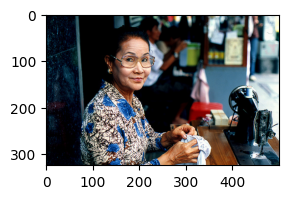

In [2999]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3001]:
ix = random.choice(list(range(0,500)))
ix

57

A little kid holds up a remote control in front of the television .


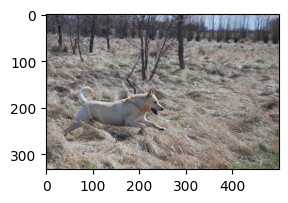

In [3002]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3005]:
ix = random.choice(list(range(0,500)))
ix

12

These girls are in uniforms and are playing field hockey .


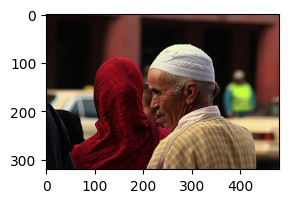

In [3006]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3010]:
ix = random.choice(list(range(0,500)))
ix

379

A spotted dog stands on his hind legs to catch a ball on the beach .


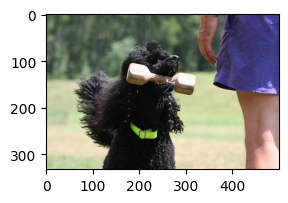

In [3011]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3016]:
ix = random.choice(list(range(0,500)))
ix

140

A boy and a girl at the beach , throwing sand .


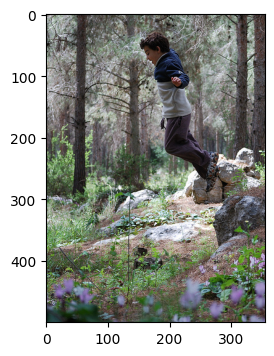

In [3017]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3023]:
ix = random.choice(list(range(0,500)))
ix

125

a tan dog jumping through the field with some barren trees in the background


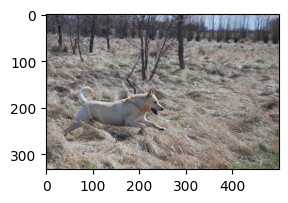

In [3024]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3031]:
ix = random.choice(list(range(0,500)))
ix

114

There is an older white haired lady and a bulldog sitting on a tree stump .


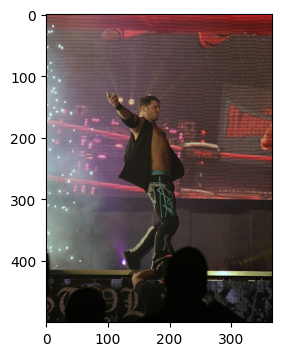

In [3032]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3040]:
ix = random.choice(list(range(0,500)))
ix

71

A woman and a younger girl , both wearing blue jackets and knit caps , slide down a hill on a snow sled , a dog running at their side .


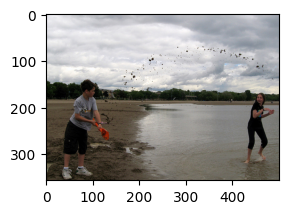

In [3041]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3050]:
ix = random.choice(list(range(0,500)))
ix

377

A dog jumping for a tennis ball near an ocean


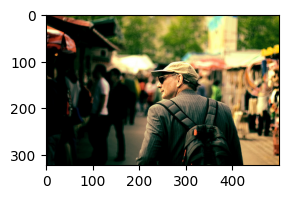

In [3051]:
ind = found_picture(ix)
draw_picture(ix, ind)

In [3182]:
ix = random.choice(list(range(0,500)))
ix

15

A brown dog is sitting in some long grass .


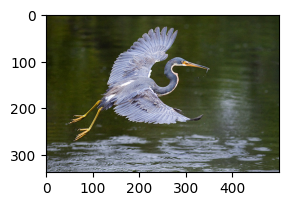

In [3183]:
ind = found_picture(ix)
draw_picture(ix, ind)

<div class="alert alert-info">
     Вывод:
     Результаты работы алгоритма при анализе соответствия случайно выбранного описания из тестоволй выборки и тестовой картинки, объединенный вектор 
которых имеет наилучшую метрику предобученной нейросети, показывает следующие тенденции:
      - из 10 случайно выбранных тестовых описаний только 2 текста (№№ 379, 125) более-менее соответствуют содержанию оптимальной картинки. То есть,
надежность работы алгоритма не превышает 20 %,
      - для некоторых текстов (№№ 71, 140, 12) найдены картинки, ограниченно соответствующие запросу в отдельных элементах - количестве объектов, 
одежде, деятельности или динамике.
      - остальные 5 картинок (50 %) полностью не соответствуют запросу ни по содержанию, ни по цветовой гамме.
     Таким образом, разработанный алгоритм можно признать весьма ограниченно пригодным для выбора картинок, соответствующих описанию, который точен
только в 20 % случаев и полностью ошибается в 50 % случаев. Очевидно, что повысить точность поиска возможно, увеличив количество пар объектов в 
трейновой выборке, например, на порядок и приняв меры к предотвращению переобучения. 

</div>